# Dynamic Time Warping 

This notebook was purposed for understanding the dtw algorithm and its property
-Minbo Chung-

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import my_utils as fx
import re
import plotly.io as pio
from IPython.display import display,HTML
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import *
from plotly.graph_objs import *
import math
from collections import Counter
import os
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import matplotlib.cm as cm

plotly.offline.init_notebook_mode()
pio.renderers.default = "notebook+pdf"
sns.set(rc = {'figure.figsize':(20,15)})

local = True # False if in Google colab

In [2]:
def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

def my_dtw(x, y):
    n, m = len(x), len(y)
    # Initialization
    D = np.zeros((n+1,m+1))
    for i in range(n+1):
        for j in range(m+1):
            D[i,j] = np.inf
    D[0,0] = 0
    
    # Calculate cost matrix
    for i in range(1, n+1):
        x_index = i - 1
        # n+1 to reach nth place
        for j in range(1, m+1):
            y_index = j - 1
            D[i,j] = abs(x[x_index] - y[y_index]) + np.min(
                [D[i-1, j-1], # Match
                D[i-1, j],   # Insert
                D[i, j-1]]    # Deletion
            )
    return D

In [3]:
path = './dataset/preprocessed/'
aggr_datasets, calm_datasets = [], []
for directory, r, files in os.walk(path):
    if directory == './dataset/preprocessed/aggr':
        for file in files:
            aggr_datasets.append(pd.read_csv(filepath_or_buffer=directory+'/'+file, sep=';').drop('Unnamed: 0', axis=1))
    elif directory == './dataset/preprocessed/calm':
        for file in files:
            calm_datasets.append(pd.read_csv(filepath_or_buffer=directory+'/'+file, sep=';').drop('Unnamed: 0', axis=1))

In [4]:
a1, a2, a3, a4, a5, a6, a7, a8, a9, a10 = tuple(aggr_datasets)
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = tuple(calm_datasets)

In [5]:
x, y = [0,1,2,3,4], [0,1,2,3,4]
# x, y = a1.g_z, a1.g_z

In [6]:
my_dtw(x,y)

array([[ 0., inf, inf, inf, inf, inf],
       [inf,  0.,  1.,  3.,  6., 10.],
       [inf,  1.,  0.,  1.,  3.,  6.],
       [inf,  3.,  1.,  0.,  1.,  3.],
       [inf,  6.,  3.,  1.,  0.,  1.],
       [inf, 10.,  6.,  3.,  1.,  0.]])

In [7]:
d, p = fastdtw(list(a1[a1['roundabout_2']==1].reset_index(drop=True).g_z),
               list(a10[a10['roundabout_2']==1].reset_index(drop=True).g_z), dist=euclidean)

In [8]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random

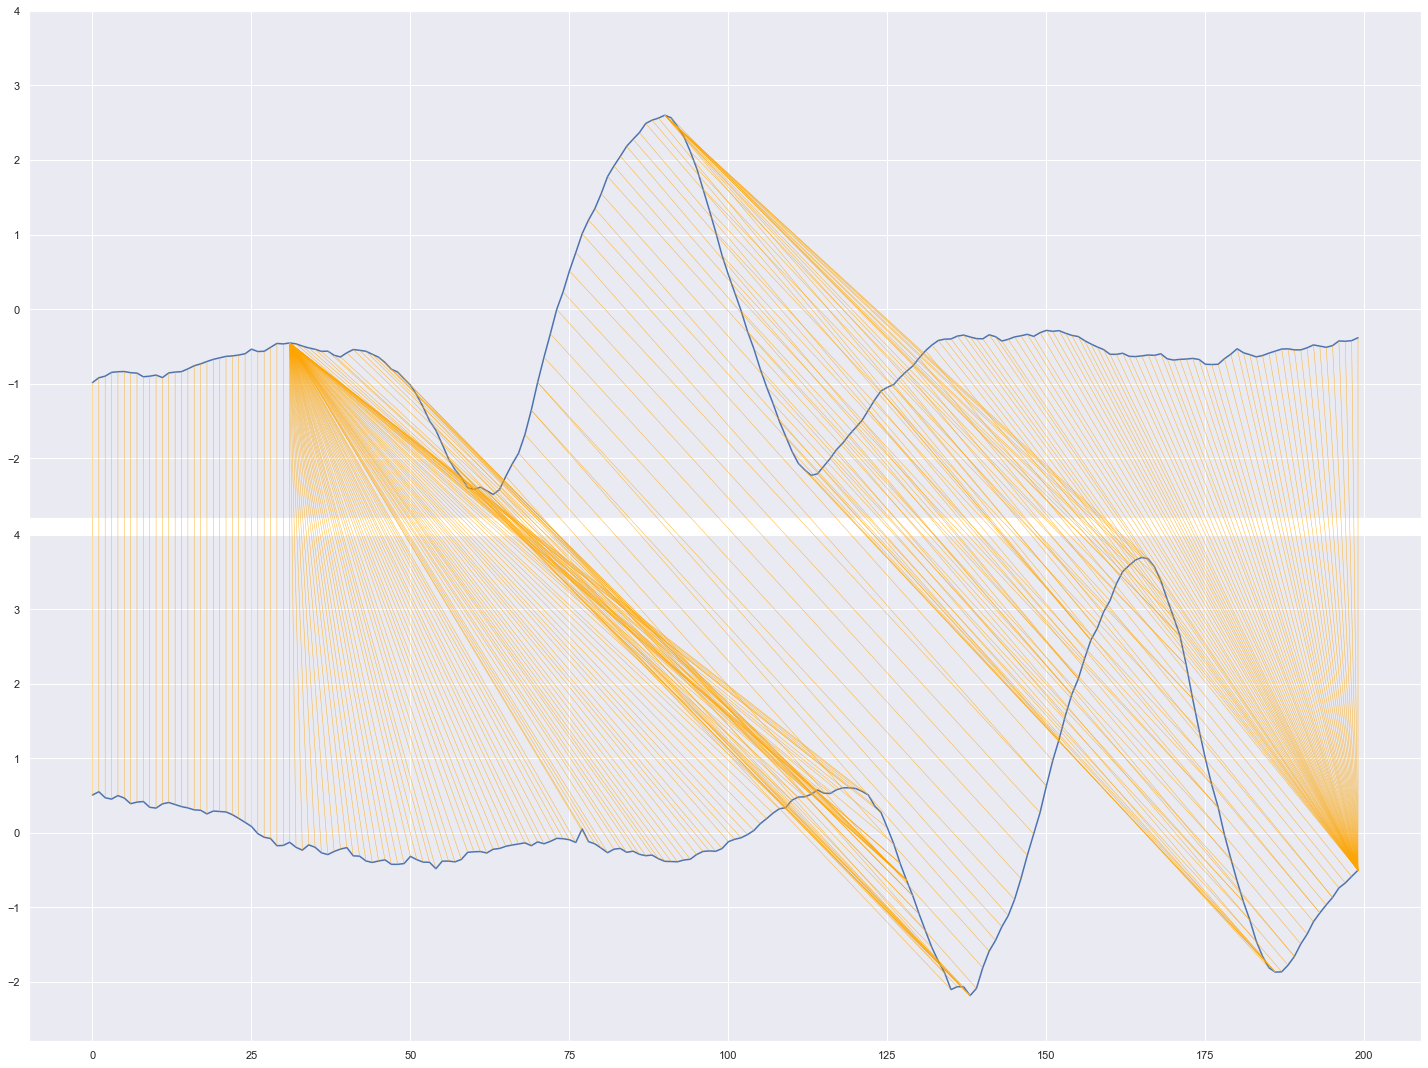

In [9]:
s1 = a1[a1['roundabout_2']==1].reset_index(drop=True).yaw 
s2 = a4[a4['roundabout_2']==1].reset_index(drop=True).yaw

path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)
distance = dtw.distance(s1, s2)

In [10]:
distance

8.222702368960517

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

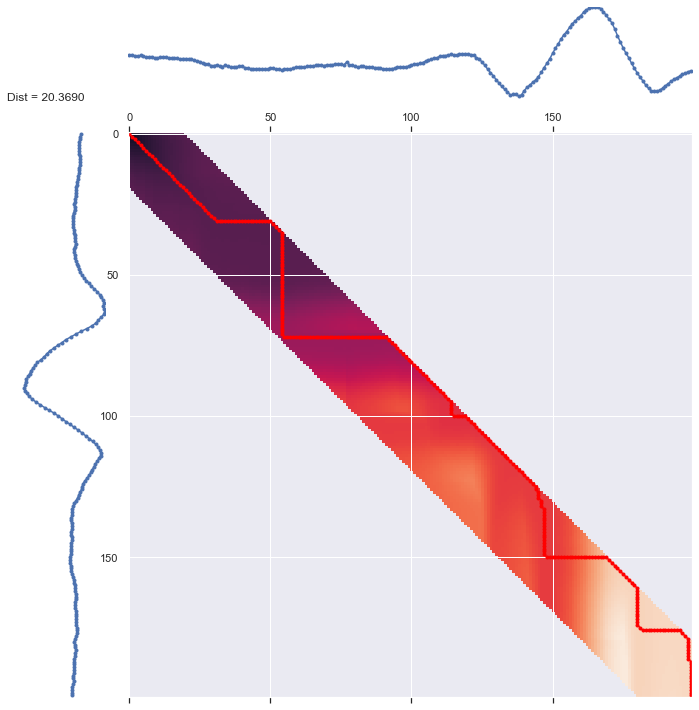

In [11]:
d, paths = dtw.warping_paths(s1, s2, window=20, use_pruning=True)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

Subsequence DTW

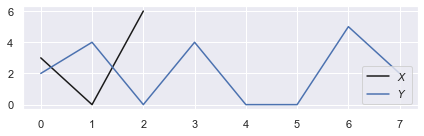

Sequence X = [3 0 6]
Sequence Y = [2 4 0 4 0 0 5 2]


In [12]:
import os
import sys
import numpy as np
import librosa
from numba import jit
import matplotlib.pyplot as plt
from matplotlib import patches

sys.path.append('..')
import libfmp.b
import libfmp.c3
import libfmp.c7
%matplotlib inline

X = np.array([3, 0, 6])
Y = np.array([2, 4, 0, 4, 0, 0, 5, 2])
N = len(X)
M = len(Y)

plt.figure(figsize=(6, 2))
plt.plot(X, c='k', label='$X$')
plt.plot(Y, c='b', label='$Y$')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print('Sequence X =', X)
print('Sequence Y =', Y)

When trying downloading librosa, make sure to conda install -c numba numba before downloading librosa

In [13]:
C =  libfmp.c3.compute_cost_matrix(X, Y, metric='euclidean')
print('Cost matrix C =', C, sep='\n')

Cost matrix C =
[[1. 1. 3. 1. 3. 3. 2. 1.]
 [2. 4. 0. 4. 0. 0. 5. 2.]
 [4. 2. 6. 2. 6. 6. 1. 4.]]


In [14]:
@jit(nopython=True)
def compute_accumulated_cost_matrix_subsequence_dtw(C):
    """Given the cost matrix, compute the accumulated cost matrix for
    subsequence dynamic time warping with step sizes {(1, 0), (0, 1), (1, 1)}

    Notebook: C7/C7S2_SubsequenceDTW.ipynb

    Args:
        C (np.ndarray): Cost matrix

    Returns:
        D (np.ndarray): Accumulated cost matrix
    """
    N, M = C.shape
    D = np.zeros((N, M))
    D[:, 0] = np.cumsum(C[:, 0])
    D[0, :] = C[0, :]
    for n in range(1, N):
        for m in range(1, M):
            D[n, m] = C[n, m] + min(D[n-1, m], D[n, m-1], D[n-1, m-1])
    return D

D =  compute_accumulated_cost_matrix_subsequence_dtw(C)
print('Accumulated cost matrix D =', D, sep='\n')
b_ast = D[-1, :].argmin()
print('b* =', b_ast)
print('Accumulated cost D[N, b*] = ', D[-1, b_ast])

Accumulated cost matrix D =
[[1. 1. 3. 1. 3. 3. 2. 1.]
 [3. 5. 1. 5. 1. 1. 6. 3.]
 [7. 5. 7. 3. 7. 7. 2. 6.]]
b* = 6
Accumulated cost D[N, b*] =  2.0


In [15]:
@jit(nopython=True)
def compute_optimal_warping_path_subsequence_dtw(D, m=-1):
    """Given an accumulated cost matrix, compute the warping path for
    subsequence dynamic time warping with step sizes {(1, 0), (0, 1), (1, 1)}

    Notebook: C7/C7S2_SubsequenceDTW.ipynb

    Args:
        D (np.ndarray): Accumulated cost matrix
        m (int): Index to start back tracking; if set to -1, optimal m is used (Default value = -1)

    Returns:
        P (np.ndarray): Optimal warping path (array of index pairs)
    """
    N, M = D.shape
    n = N - 1
    if m < 0:
        m = D[N - 1, :].argmin()
    P = [(n, m)]

    while n > 0:
        if m == 0:
            cell = (n - 1, 0)
        else:
            val = min(D[n-1, m-1], D[n-1, m], D[n, m-1])
            if val == D[n-1, m-1]:
                cell = (n-1, m-1)
            elif val == D[n-1, m]:
                cell = (n-1, m)
            else:
                cell = (n, m-1)
        P.append(cell)
        n, m = cell
    P.reverse()
    P = np.array(P)
    return P
        
P = compute_optimal_warping_path_subsequence_dtw(D)
print('Optimal warping path P =', P.tolist())
a_ast = P[0, 1]
b_ast = P[-1, 1]
print('a* =', a_ast)
print('b* =', b_ast)
print('Sequence X =', X)
print('Sequence Y =', Y)
print('Optimal subsequence Y(a*:b*) =', Y[a_ast:b_ast+1])
print('Accumulated cost D[N, b_ast]= ', D[-1, b_ast])

Optimal warping path P = [[0, 3], [1, 4], [1, 5], [2, 6]]
a* = 3
b* = 6
Sequence X = [3 0 6]
Sequence Y = [2 4 0 4 0 0 5 2]
Optimal subsequence Y(a*:b*) = [4 0 0 5]
Accumulated cost D[N, b_ast]=  2.0


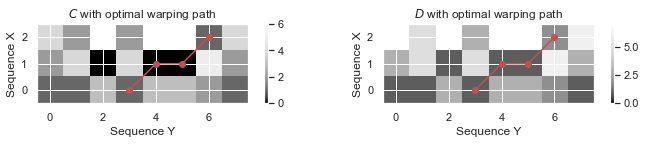

In [16]:
cmap = libfmp.b.compressed_gray_cmap(alpha=-10, reverse=True)

plt.figure(figsize=(10, 1.8))
ax = plt.subplot(1, 2, 1)
libfmp.c3.plot_matrix_with_points(C, P, linestyle='-', ax=[ax], aspect='equal',
                                  clim=[0, np.max(C)], cmap=cmap, title='$C$ with optimal warping path',
                                  xlabel='Sequence Y', ylabel='Sequence X')

ax = plt.subplot(1, 2, 2)
libfmp.c3.plot_matrix_with_points(D, P, linestyle='-', ax=[ax], aspect='equal',
                                  clim=[0, np.max(D)], cmap=cmap, title='$D$ with optimal warping path',
                                  xlabel='Sequence Y', ylabel='Sequence X')

plt.tight_layout()

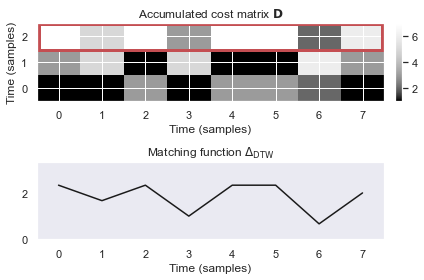

In [17]:
Delta = D[-1, :] / N 

fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.02], 
                                          'height_ratios': [1, 1]}, figsize=(6, 4))  
cmap = libfmp.b.compressed_gray_cmap(alpha=-10, reverse=True)
libfmp.b.plot_matrix(D, title=r'Accumulated cost matrix $\mathbf{D}$', xlabel='Time (samples)',
                     ylabel='Time (samples)',  ax=[ax[0, 0], ax[0, 1]], colorbar=True, cmap=cmap)
rect = patches.Rectangle((-0.45, 1.48), len(Delta)-0.1, 1, linewidth=3, edgecolor='r', facecolor='none')
ax[0, 0].add_patch(rect)

libfmp.b.plot_signal(Delta, ax=ax[1, 0], xlabel='Time (samples)', ylabel='', ylim=[0, np.max(Delta)+1], 
                     title = r'Matching function $\Delta_\mathrm{DTW}$', color='k')
ax[1, 0].set_xlim([-0.5, len(Delta)-0.5])
ax[1, 0].grid()
ax[1, 1].axis('off')
plt.tight_layout()

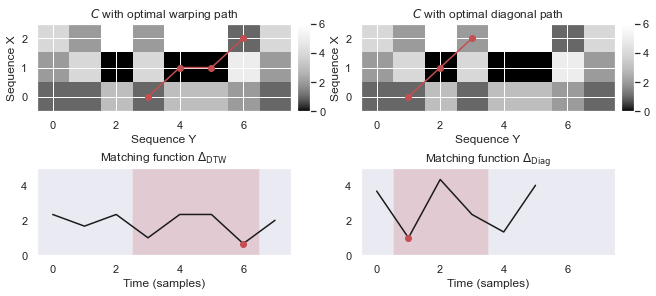

In [18]:
N = len(X)
M = len(Y)
C =  libfmp.c3.compute_cost_matrix(X, Y, metric='euclidean')

# Subsequence DTW
D =  compute_accumulated_cost_matrix_subsequence_dtw(C)
Delta_DTW = D[-1, :] / N 
P_DTW = compute_optimal_warping_path_subsequence_dtw(D)
a_ast = P[0, 1]
b_ast = P[-1, 1]

# Diagonal matching
Delta_Diag = libfmp.c7.matching_function_diag(C)
m = np.argmin(Delta_Diag)
P_Diag = []
for n in range(N): 
    P_Diag.append((n, m+n))
P_Diag = np.array(P_Diag)
matches_Diag = [(m, N)]


# Visualization
fig, ax = plt.subplots(2, 4, gridspec_kw={'width_ratios': [1, 0.05, 1, 0.05], 
                                          'height_ratios': [1, 1]}, 
                       constrained_layout=True, figsize=(9, 4))  
cmap = libfmp.b.compressed_gray_cmap(alpha=-10, reverse=True)
libfmp.c3.plot_matrix_with_points(C, P_DTW, linestyle='-', ax=[ax[0, 0], ax[0, 1]],
                                  clim=[0, np.max(C)], cmap=cmap, title='$C$ with optimal warping path',
                                  xlabel='Sequence Y', ylabel='Sequence X')
libfmp.b.plot_signal(Delta_DTW, ax=ax[1,0], xlabel='Time (samples)', ylabel='', ylim=[0, 5],
                     title=r'Matching function $\Delta_\mathrm{DTW}$', color='k')
ax[1, 0].set_xlim([-0.5, len(Delta)-0.5])
ax[1, 0].grid()
ax[1, 0].plot(b_ast, Delta_DTW[b_ast], 'ro')
ax[1, 0].add_patch(patches.Rectangle((a_ast-0.5, 0), b_ast-a_ast+1, 7, facecolor='r', alpha=0.2))
ax[1, 1].axis('off')

libfmp.c3.plot_matrix_with_points(C, P_Diag, linestyle='-', ax=[ax[0, 2], ax[0, 3]],
                                  clim=[0, np.max(C)], cmap=cmap, title='$C$ with optimal diagonal path',
                                  xlabel='Sequence Y', ylabel='Sequence X')
libfmp.b.plot_signal(Delta_Diag, ax=ax[1, 2], xlabel='Time (samples)', ylabel='', 
                     ylim=[0, 5], title = r'Matching function $\Delta_\mathrm{Diag}$', color='k')
ax[1, 2].set_xlim([-0.5, len(Delta)-0.5])
ax[1, 2].grid()
ax[1, 2].plot(m, Delta_Diag[m], 'ro')
ax[1, 2].add_patch(patches.Rectangle((m-0.5, 0), N, 7, facecolor='r', alpha=0.2))
ax[1, 3].axis('off');


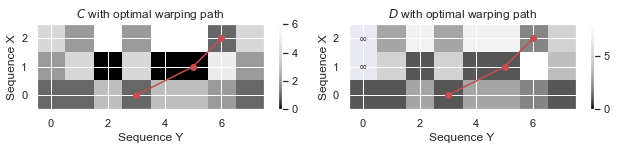

In [19]:
@jit(nopython=True)
def compute_accumulated_cost_matrix_subsequence_dtw_21(C):
    """Given the cost matrix, compute the accumulated cost matrix for
    subsequence dynamic time warping with step sizes {(1, 1), (2, 1), (1, 2)}

    Notebook: C7/C7S2_SubsequenceDTW.ipynb

    Args:
        C (np.ndarray): Cost matrix

    Returns:
        D (np.ndarray): Accumulated cost matrix
    """
    N, M = C.shape
    D = np.zeros((N + 1, M + 2))
    D[0:1, :] = np.inf
    D[:, 0:2] = np.inf

    D[1, 2:] = C[0, :]

    for n in range(1, N):
        for m in range(0, M):
            if n == 0 and m == 0:
                continue
            D[n+1, m+2] = C[n, m] + min(D[n-1+1, m-1+2], D[n-2+1, m-1+2], D[n-1+1, m-2+2])
    D = D[1:, 2:]
    return D


@jit(nopython=True)
def compute_optimal_warping_path_subsequence_dtw_21(D, m=-1):
    """Given an accumulated cost matrix, compute the warping path for
    subsequence dynamic time warping with step sizes {(1, 1), (2, 1), (1, 2)}

    Notebook: C7/C7S2_SubsequenceDTW.ipynb

    Args:
        D (np.ndarray): Accumulated cost matrix
        m (int): Index to start back tracking; if set to -1, optimal m is used (Default value = -1)

    Returns:
        P (np.ndarray): Optimal warping path (array of index pairs)
    """
    N, M = D.shape
    n = N - 1
    if m < 0:
        m = D[N - 1, :].argmin()
    P = [(n, m)]

    while n > 0:
        if m == 0:
            cell = (n-1, 0)
        else:
            val = min(D[n-1, m-1], D[n-2, m-1], D[n-1, m-2])
            if val == D[n-1, m-1]:
                cell = (n-1, m-1)
            elif val == D[n-2, m-1]:
                cell = (n-2, m-1)
            else:
                cell = (n-1, m-2)
        P.append(cell)
        n, m = cell
    P.reverse()
    P = np.array(P)
    return P

C =  libfmp.c3.compute_cost_matrix(X, Y, metric='euclidean')
D = compute_accumulated_cost_matrix_subsequence_dtw_21(C)
P = compute_optimal_warping_path_subsequence_dtw_21(D)

plt.figure(figsize=(9, 1.8))
ax = plt.subplot(1, 2, 1)
libfmp.c3.plot_matrix_with_points(C, P, linestyle='-', ax=[ax], aspect='equal',
                                  clim=[0, np.max(C)], cmap=cmap, title='$C$ with optimal warping path',
                                  xlabel='Sequence Y', ylabel='Sequence X')

ax = plt.subplot(1, 2, 2)
D_max = np.nanmax(D[D != np.inf])
libfmp.c3.plot_matrix_with_points(D, P, linestyle='-', ax=[ax], aspect='equal',
                                  clim=[0, D_max], cmap=cmap, title='$D$ with optimal warping path', 
                                  xlabel='Sequence Y', ylabel='Sequence X')
for x, y in zip(*np.where(np.isinf(D))):
    plt.text(y, x, '$\infty$', horizontalalignment='center', verticalalignment='center')
    
plt.tight_layout()

D matrices are equal.
Warping paths are equal.


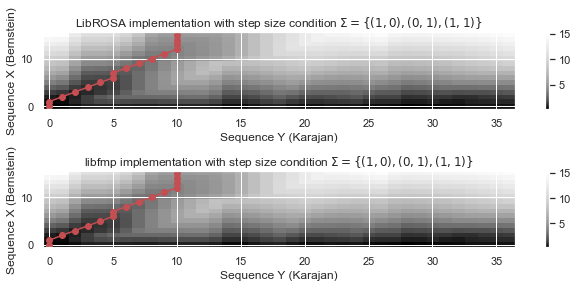

In [20]:
def check_matrices(M1, M2, label='Matrices'):
    if (M1.shape != M2.shape):
        print(label, 'have different shape!', (M1.shape, M2.shape))
    elif not np.allclose(M1, M2):
        print(label, 'are numerical different!')
    else:
        print(label, 'are equal.')
        
        
Fs = 22050
N_feat = 4410
H_feat = 2205

# data_dir = os.path.join('.')
fn1 = './FMP_C7_Audio_Beethoven_Op067-01-001-005_Bernstein.wav'
fn2 = './FMP_C7_Audio_Beethoven_Op067-01-001-021_Karajan.wav'

x1, Fs = librosa.load(fn1, sr=Fs)
x2, Fs = librosa.load(fn2, sr=Fs)
C1 = librosa.feature.chroma_stft(y=x1, sr=Fs, tuning=0, norm=None, hop_length=H_feat, n_fft=N_feat)
C2 = librosa.feature.chroma_stft(y=x2, sr=Fs, tuning=0, norm=None, hop_length=H_feat, n_fft=N_feat)
ell = 21
d = 5
X, Fs_cens = libfmp.c7.compute_cens_from_chromagram(C1, ell=21, d=5)
Y, Fs_cens = libfmp.c7.compute_cens_from_chromagram(C2, ell=21, d=5)
N, M = X.shape[1], Y.shape[1]

C_FMP = libfmp.c3.compute_cost_matrix(X, Y, 'euclidean')
#C_FMP = libfmp.c7.cost_matrix_dot(X, Y)
D_FMP = libfmp.c7.compute_accumulated_cost_matrix_subsequence_dtw(C_FMP)
P_FMP = libfmp.c7.compute_optimal_warping_path_subsequence_dtw(D_FMP)
    
sigma = np.array([[1, 0], [0, 1], [1, 1]])
#D_librosa, P_librosa = librosa.sequence.dtw(X, Y, metric='euclidean',
#                                            step_sizes_sigma=sigma, subseq=True, 
#                                            backtrack=True)
D_librosa, P_librosa = librosa.sequence.dtw(C=C_FMP, step_sizes_sigma=sigma, subseq=True, 
                                            backtrack=True)
P_librosa = P_librosa[::-1, :]

check_matrices(D_librosa, D_FMP, 'D matrices')
check_matrices(P_librosa, P_FMP, 'Warping paths')
    
fig, ax = plt.subplots(2, 1, figsize=(9, 4))
title='LibROSA implementation with step size condition $\Sigma=\{(1, 0), (0, 1), (1, 1)\}$'
libfmp.c3.plot_matrix_with_points(D_librosa, P_librosa, ax=[ax[0]], cmap=cmap, 
                                  xlabel='Sequence Y (Karajan)', ylabel='Sequence X (Bernstein)', 
                                  title=title,
                                  marker='o', linestyle='-')
title='libfmp implementation with step size condition $\Sigma=\{(1, 0), (0, 1), (1, 1)\}$'
libfmp.c3.plot_matrix_with_points(D_FMP, P_FMP, ax=[ax[1]], cmap=cmap,
                                  xlabel='Sequence Y (Karajan)', ylabel='Sequence X (Bernstein)',
                                  title=title,
                                  marker='o', linestyle='-')
plt.tight_layout()

D matrices are equal.
Warping paths are equal.


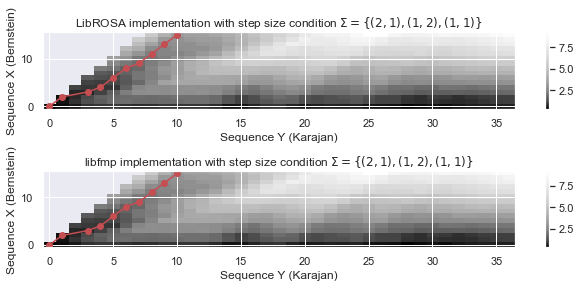

In [21]:
C_FMP = libfmp.c3.compute_cost_matrix(X, Y, 'euclidean')
D_FMP = libfmp.c7.compute_accumulated_cost_matrix_subsequence_dtw_21(C_FMP)
P_FMP = libfmp.c7.compute_optimal_warping_path_subsequence_dtw_21(D_FMP)
    
sigma = np.array([[2, 1], [1, 2], [1, 1]])
#D_librosa, P_librosa = librosa.sequence.dtw(X, Y, metric='euclidean',
#                                            step_sizes_sigma=sigma, subseq=True, 
#                                            backtrack=True)
D_librosa, P_librosa = librosa.sequence.dtw(C=C_FMP, step_sizes_sigma=sigma, subseq=True, 
                                            backtrack=True)

P_librosa = P_librosa[::-1, :]

check_matrices(D_librosa, D_FMP, 'D matrices')
check_matrices(P_librosa, P_FMP, 'Warping paths')
    
fig, ax = plt.subplots(2, 1, figsize=(9, 4))
title='LibROSA implementation with step size condition $\Sigma=\{(2, 1), (1, 2), (1, 1)\}$'
libfmp.c3.plot_matrix_with_points(D_librosa, P_librosa, ax=[ax[0]], cmap=cmap,
                                  xlabel='Sequence Y (Karajan)', ylabel='Sequence X (Bernstein)',
                                  title=title,
                                  marker='o', linestyle='-')
title='libfmp implementation with step size condition $\Sigma=\{(2, 1), (1, 2), (1, 1)\}$'
libfmp.c3.plot_matrix_with_points(D_FMP, P_FMP, ax=[ax[1]], cmap=cmap,
                                  xlabel='Sequence Y (Karajan)', ylabel='Sequence X (Bernstein)',
                                  title=title,
                                  marker='o', linestyle='-')
plt.tight_layout()